# Decision Tree for Fraud Check

In [1]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [32]:
#Load the dataset
fraudcheck_data = pd.read_csv('C:\Data Science\Assignments\Decision Tree\Fraud_check.csv')
fraudcheck_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [33]:
#Check for missing values
fraudcheck_data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [34]:
fraudcheck_data.shape

(600, 6)

In [35]:
# Let's see how many unique categories we have in this property - occupation
undergrad_set = set(fraudcheck_data['Undergrad'])
print(undergrad_set)

Marital_set = set(fraudcheck_data['Marital.Status'])
print(Marital_set)

Urban_set = set(fraudcheck_data['Urban'])
print(Urban_set)

{'NO', 'YES'}
{'Married', 'Divorced', 'Single'}
{'NO', 'YES'}


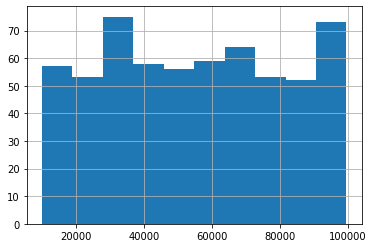

In [36]:
#Histogram of Taxable income
#hist.fraudcheck_data['Taxable.Income']
#fraudcheck_data['Taxable.Income'].plot(kind='box', subplots=True, layout=(3,3), sharex=True, sharey=True)
fraudcheck_data['Taxable.Income'].hist()

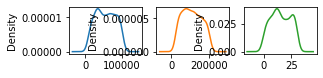

In [37]:
from pandas.plotting import scatter_matrix
#2D Density plot, contors-plot
#sns.jointplot(x="Taxable.Income", y="class", data=fraudcheck_data, kind="kde");
#plt.show();
fraudcheck_data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False)
#scatter_matrix(fraudcheck_data)
plt.show()

In [38]:
# Add a new column named 'Class' 
fraudcheck_data['class'] = ['Good' if x > 30000 else 'Risky' for x in fraudcheck_data['Taxable.Income']] 

# Print the DataFrame 
print(fraudcheck_data['class'])

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: class, Length: 600, dtype: object


In [39]:
#How many Risky cases as how many good cases
fraudcheck_data['class'].value_counts()

Good     476
Risky    124
Name: class, dtype: int64

In [40]:
#fraudcheck_data['class'] = fraudcheck_data['class'].map({'Risky': 0, 'Good': 1}).astype(int)
#fraudcheck_data['class'].value_counts()

In [41]:
#fraudcheck_data['Taxable.Income'].describe()
fraudcheck_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [42]:
fraudcheck_data['Undergrad']

0       NO
1      YES
2       NO
3      YES
4       NO
      ... 
595    YES
596    YES
597     NO
598    YES
599     NO
Name: Undergrad, Length: 600, dtype: object

In [43]:
#fraudcheck_data[fraudcheck_data['Undergrad'].isnull()]
# Now we classify them as numbers instead of their names.
fraudcheck_data['Undergrad'] = fraudcheck_data['Undergrad'].map({'NO': 0, 'YES': 1}).astype(int)
print(fraudcheck_data['Undergrad'])

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32


In [44]:
fraudcheck_data['Urban'] = fraudcheck_data['Urban'].map({'NO': 0, 'YES': 1}).astype(int)
print(fraudcheck_data['Urban'])

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32


In [45]:
# Now we classify them as numbers instead of their names.
fraudcheck_data['Marital.Status'] = fraudcheck_data['Marital.Status'].map({'Single': 0, 'Married': 1, 'Divorced':2 }).astype(int)
print(fraudcheck_data['Marital.Status'])

0      0
1      2
2      1
3      0
4      1
      ..
595    2
596    2
597    2
598    1
599    2
Name: Marital.Status, Length: 600, dtype: int32


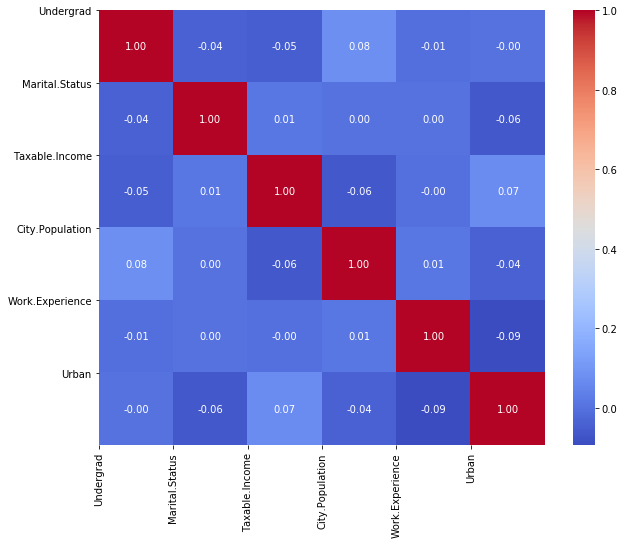

In [46]:
#Data Visualization
corr = fraudcheck_data.corr()

#Plot
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [47]:
#Data Normalization
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

# separate array into input and output components
X = fraudcheck_data[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']].values
Y = fraudcheck_data['class'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# summarize transformed data
set_printoptions(precision=3)
print(X_train[0:11,:])
print(X_test[0:11,:])

[[ 0.958  0.035  1.433  0.478 -1.01 ]
 [-1.044  0.035 -0.497 -1.759  0.991]
 [-1.044  0.035  0.944 -0.529  0.991]
 [ 0.958 -1.182  0.372  0.478  0.991]
 [-1.044  1.252  1.867 -1.536  0.991]
 [-1.044 -1.182 -1.048 -0.641 -1.01 ]
 [ 0.958  1.252 -1.148 -0.864 -1.01 ]
 [-1.044  1.252  0.242 -0.529 -1.01 ]
 [ 0.958  0.035 -1.51  -0.976  0.991]
 [ 0.958 -1.182  1.052  0.59  -1.01 ]
 [ 0.958 -1.182  0.394 -1.536 -1.01 ]]
[[ 0.958 -1.182  1.541 -0.305  0.991]
 [ 0.958 -1.182  0.694 -0.976 -1.01 ]
 [-1.044 -1.182  1.914  1.149  0.991]
 [ 0.958  1.252  0.146 -0.193 -1.01 ]
 [-1.044 -1.182 -0.277  0.814 -1.01 ]
 [-1.044  1.252 -0.448 -0.193 -1.01 ]
 [-1.044 -1.182  1.199 -0.529  0.991]
 [-1.044  1.252 -0.637  1.373  0.991]
 [-1.044  1.252  0.22   0.59  -1.01 ]
 [ 0.958  1.252  0.271 -1.088 -1.01 ]
 [ 0.958 -1.182 -0.812 -0.305  0.991]]


In [48]:
#Model Building using various models
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#Decision tree
dt = DecisionTreeClassifier() #storing the classifer in dt
dt.fit(X_train,y_train) #fitting te model 
y_pred = dt.predict(X_test)
score = dt.score(X_test,y_test) #checking the score like accuracy
print("Test Accuracy",score )

score1 = dt.score(X_train,y_train)
print("Train Accuracy",score )
#Confusion Matrix
cn = confusion_matrix(y_test, y_pred)
print("DT Confusion Matrix", cn)
print("************************")


#Ensemble Techniques
###########################################
#Random Forest clssifer: it is a ensemble of Decision tree 
rf = RandomForestClassifier(n_estimators=100) # n_estimator number of tree in the forest 
rf.fit(X_train,y_train) #fitting the random forest model 
y_pred1= rf.predict(X_test)
rfscore = rf.score(X_test,y_test) #doing the accuracy of the test model 
print("RF Test Accuracy", rfscore)

rfscore1 = rf.score(X_train,y_train) #doing the accuracy of the train model 
print("RF train Accuracy", rfscore1)

cn = confusion_matrix(y_test, y_pred1)
print("RF Confusion", cn)
print("************************")


#Bagging - Gradient 
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=100)
bg.fit(X_train,y_train) #fitting the model 
y_pred2= bg.predict(X_test)

bgscore = bg.score(X_test,y_test) #test accuracy
print("BG test Accuracy", bgscore)

bgscore1 = bg.score(X_train,y_train) #train accuracy 
print("BG train Accuracy", bgscore1)

cn = confusion_matrix(y_test, y_pred2)
print("BG Confusion", cn)
print("************************")

#Ada boosting 
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100,learning_rate=1)
ada.fit(X_train,y_train)
y_pred3= ada.predict(X_test)

adascore = ada.score(X_test,y_test)
print("ada test Accuracy", adascore)

adascore1 = ada.score(X_train,y_train)
print("ada train Accuracy", adascore1)

cn = confusion_matrix(y_test, y_pred3)
print("ada Confusion", cn)
print("************************")

# Voting Classifier 
from sklearn.linear_model import LogisticRegression #importing logistc regression
from sklearn.svm import SVC #importing Svm 

lr = LogisticRegression() 
dt = DecisionTreeClassifier()
svm = SVC(kernel= 'poly', degree=2)
lda = LinearDiscriminantAnalysis()

evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('svm',svm),('lda',lda)],voting='hard')
evc.fit(X_train,y_train)
y_pred4= evc.predict(X_test)

evcscore = evc.score(X_test,y_test)
print("Voting test Accuracy", adascore)

evcscore1 = evc.score(X_train,y_train)
print("Voting train Accuracy", adascore1)

cn = confusion_matrix(y_test, y_pred4)
print("Voting Confusion Matrix", cn)


Test Accuracy 0.7055555555555556
Train Accuracy 0.7055555555555556
DT Confusion Matrix [[120  26]
 [ 27   7]]
************************
RF Test Accuracy 0.7444444444444445
RF train Accuracy 1.0
RF Confusion [[134  12]
 [ 34   0]]
************************
BG test Accuracy 0.7777777777777778
BG train Accuracy 0.9023809523809524
BG Confusion [[140   6]
 [ 34   0]]
************************
ada test Accuracy 0.6611111111111111
ada train Accuracy 1.0
ada Confusion [[112  34]
 [ 27   7]]
************************
Voting test Accuracy 0.6611111111111111
Voting train Accuracy 1.0
Voting Confusion Matrix [[146   0]
 [ 34   0]]


In [49]:
#Decicing on the Best Hyper Parameters for DecisionTree using GridSearchCV
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
     
# Create a DecisonTree
decisiontree = DecisionTreeClassifier()

# Create a pipeline 
pipe = Pipeline(steps=[('decisiontree', decisiontree)])

    
# Create lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [4,5,6,7,8,9,10,11,12]

# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
clf = GridSearchCV(pipe, parameters,scoring='accuracy', cv=10,n_jobs=-1)

# Fit the grid search
clf.fit(X_train, y_train)

# View The Best Parameters
print('Best Criterion:', clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
print(); print("best Score:", clf.best_score_)


# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_test, y_test, cv=10, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Criterion: entropy
Best max_depth: 5

best Score: 0.7761904761904761

[0.722 0.778 0.778 0.833 0.778 0.778 0.722 0.778 0.778 0.778]

0.7722222222222221

0.029917582261858366


In [50]:
#Finalize Best Model ------------------------------------
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5)
classifier = classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

score = classifier.score(X_test,y_test)
print("Model Test Accuracy", score)

score1 = classifier.score(X_train,y_train)
print("Model Train Accuracy", score1)

cn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", cn)
print("************************")

Model Test Accuracy 0.8
Model Train Accuracy 0.8047619047619048
Confusion Matrix [[143   3]
 [ 33   1]]
************************


AB: 0.771429 (0.065811)
GBM: 0.738095 (0.064769)
RF: 0.738095 (0.066496)
ET: 0.709524 (0.071270)
BG: 0.740476 (0.074116)


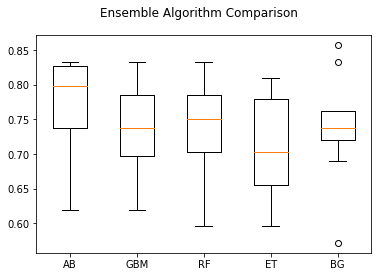

In [51]:
#################Comparison of various ensemble methods graphically - box plots
#Load libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
seed = 5
scoring = 'accuracy'

# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('BG', BaggingClassifier()))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [52]:
#Finalize Best Model ------------------------------------
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5)
classifier = classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

score = classifier.score(X_test,y_test)
print("Model Test Accuracy", score)

score1 = classifier.score(X_train,y_train)
print("Model Train Accuracy", score1)

cn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", cn)
print("************************")

#Accuracy is 80%

Model Test Accuracy 0.8
Model Train Accuracy 0.8047619047619048
Confusion Matrix [[143   3]
 [ 33   1]]
************************


In [53]:
#ensemble technique adaboost as per above observation
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada.fit(X_train,y_train)
y_pred= ada.predict(X_test)

adascore = ada.score(X_test,y_test)
print("Model Test Accuracy", adascore)

adascore1 = ada.score(X_train,y_train)
print("Model Train Accuracy", adascore1)

cn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", cn)
print("************************")

Model Test Accuracy 0.8
Model Train Accuracy 0.8023809523809524
Confusion Matrix [[144   2]
 [ 34   0]]
************************


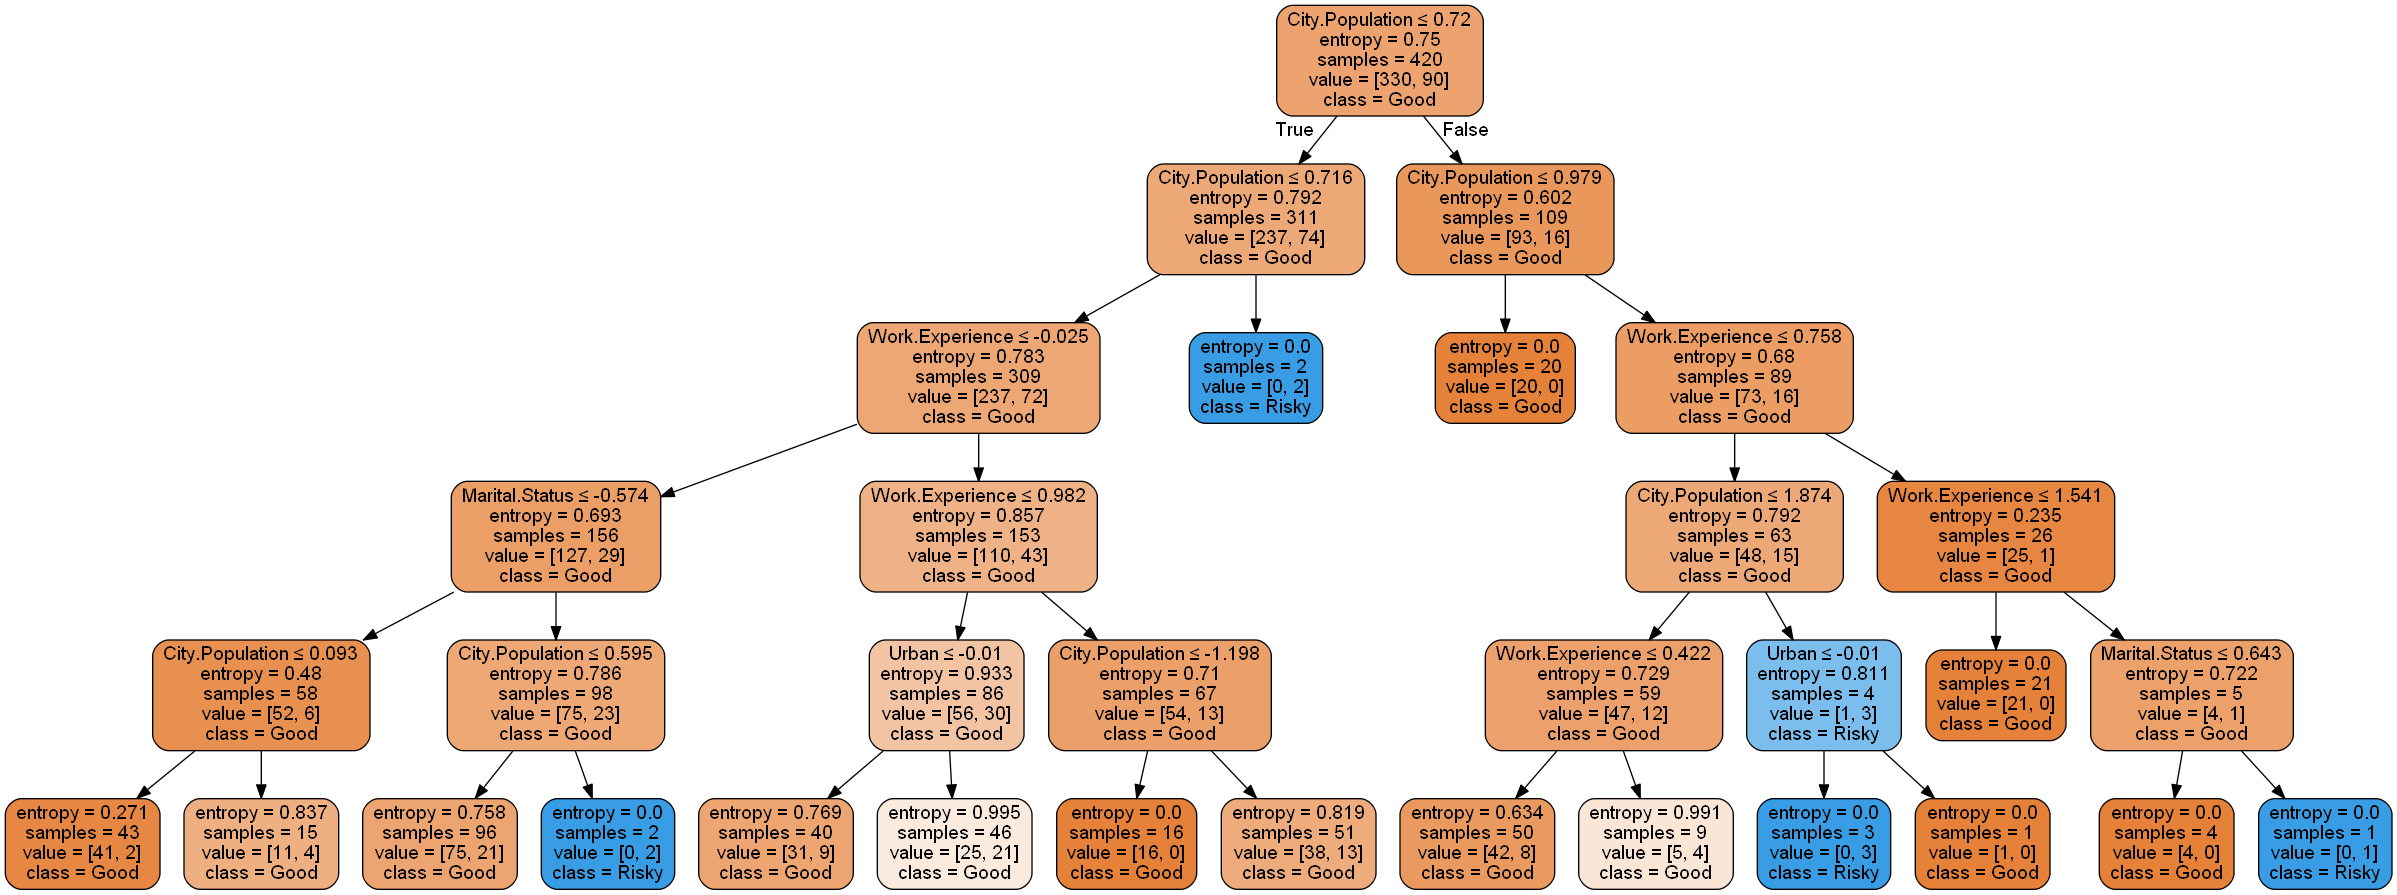

In [54]:
#Graphical Representation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'

names = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = names,class_names=['Good','Risky'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())